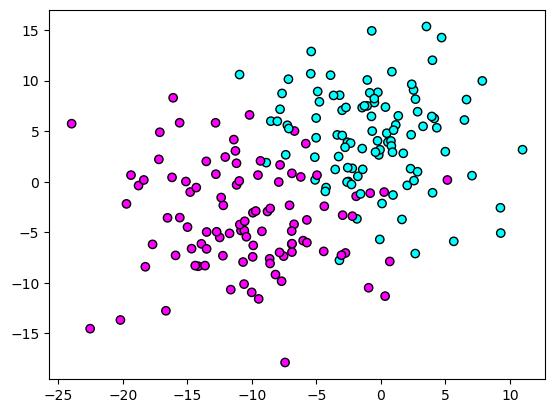

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y=make_blobs(n_samples=200, random_state=1,centers=2,cluster_std=5)
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.cool, edgecolor='k')
plt.show()

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=68)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predict_proba = gnb.predict_proba(X_test)
print('预测准确率形态：{}'.format(predict_proba.shape))
print(predict_proba[:5])

预测准确率形态：(50, 2)
[[0.98849996 0.01150004]
 [0.0495985  0.9504015 ]
 [0.01648034 0.98351966]
 [0.8168274  0.1831726 ]
 [0.00282471 0.99717529]]


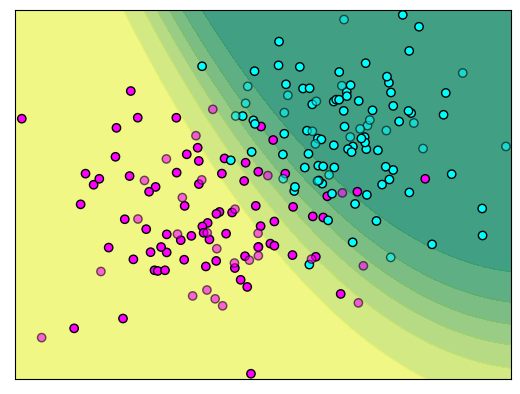

In [6]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

Z = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.summer, alpha=.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.cool,
                   edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.cool,
                   edgecolor='k', alpha=0.6)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

[-1.36071347  1.53694862  1.78825594 -0.96133081  1.81826853]


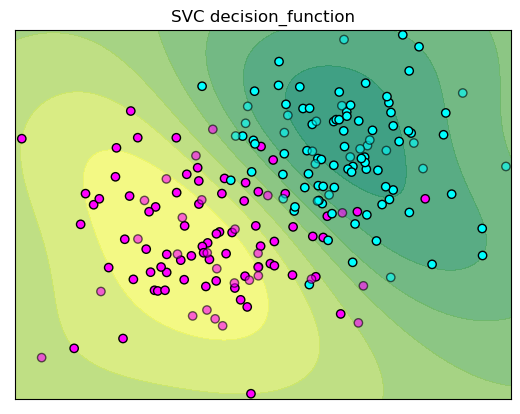

In [8]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
dec_func = svc.decision_function(X_test)
print (dec_func[:5])
Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.summer, alpha=.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.cool,
                   edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.cool,
                   edgecolor='k', alpha=0.6)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC decision_function')
plt.xticks(())
plt.yticks(())
plt.show()

使用sklearn的breast cancer wisconsin数据集(load_breast_cancer)，建立一个逻辑回归模型，并使用交叉验证进行性能评估。在交叉验证中，将数据集分为5个等分，使用每个等分作为测试集，其余4个等分作为训练集，计算模型的平均准确率和标准差。
提示：可以使用sklearn.model_selection的KFold和cross_val_score函数进行交叉验证。

In [26]:
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

cancer=load_breast_cancer()
X=cancer.data
y=cancer.target
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

lr = LogisticRegression()
lr.fit(X_train,y_train)
scores = cross_val_score(lr, X,y, cv=5)
print('LogisticRegression交叉验证得分：\n{}'.format(scores))
print('LogisticRegression交叉验证平均分：{:.3f}'.format(scores.mean()))

LogisticRegression交叉验证得分：
[0.92982456 0.93859649 0.96491228 0.94736842 0.95575221]
LogisticRegression交叉验证平均分：0.947


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
lr.fit(X_train,y_train)
kfold=KFold(n_splits=5)
kscores = cross_val_score(lr, X,y, cv=kfold)
print('LogisticRegression交叉验证得分：\n{}'.format(kscores))
print('LogisticRegression交叉验证得分平均值：{:.3f}'.format(kscores.mean()))
print('LogisticRegression交叉验证得分标准差：{:.10f}'.format(kscores.var()))

for train_index, test_index in kfold.split(X):
    print("TEST:", test_index[1],test_index[-1])


LogisticRegression交叉验证得分：
[0.9122807  0.93859649 0.97368421 0.94736842 0.95575221]
LogisticRegression交叉验证得分平均值：0.946
LogisticRegression交叉验证得分标准差：0.0004108244
TEST: 1 113
TEST: 115 227
TEST: 229 341
TEST: 343 455
TEST: 457 568
